# Real estate price

In [2]:
import pandas as pd
url = 'https://raw.githubusercontent.com/rashakil-ds/Public-Datasets/refs/heads/main/Real%20estate.csv'
df = pd.read_csv(url)

In [3]:
df.head()

,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
0,1,2012.917,32.0,84.87882,10,24.98298,121.54024,37.9
1,2,2012.917,19.5,306.59470,9,24.98034,121.53951,42.2
2,3,2013.583,13.3,561.98450,5,24.98746,121.54391,47.3
3,4,2013.500,13.3,561.98450,5,24.98746,121.54391,54.8
4,5,2012.833,5.0,390.56840,5,24.97937,121.54245,43.1


In [6]:
df = df.drop(['No','X5 latitude','X6 longitude'], axis=1)
df.head()

,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,Y house price of unit area
0,2012.917,32.0,84.87882,10,37.9
1,2012.917,19.5,306.59470,9,42.2
2,2013.583,13.3,561.98450,5,47.3
3,2013.500,13.3,561.98450,5,54.8
4,2012.833,5.0,390.56840,5,43.1


In [8]:
df['X1 transaction date'] = df['X1 transaction date'].astype(str).str.extract(r'^(\d{4})')[0]
df.head()

,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,Y house price of unit area
0,2012,32.0,84.87882,10,37.9
1,2012,19.5,306.59470,9,42.2
2,2013,13.3,561.98450,5,47.3
3,2013,13.3,561.98450,5,54.8
4,2012,5.0,390.56840,5,43.1


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 414 entries, 0 to 413
Data columns (total 5 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   X1 transaction date                     414 non-null    object 
 1   X2 house age                            414 non-null    float64
 2   X3 distance to the nearest MRT station  414 non-null    float64
 3   X4 number of convenience stores         414 non-null    int64  
 4   Y house price of unit area              414 non-null    float64
dtypes: float64(3), int64(1), object(1)
memory usage: 16.3+ KB


In [12]:
df['X1 transaction date'] = df['X1 transaction date'].astype(int)
df.head()

,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,Y house price of unit area
0,2012,32.0,84.87882,10,37.9
1,2012,19.5,306.59470,9,42.2
2,2013,13.3,561.98450,5,47.3
3,2013,13.3,561.98450,5,54.8
4,2012,5.0,390.56840,5,43.1


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 414 entries, 0 to 413
Data columns (total 5 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   X1 transaction date                     414 non-null    int32  
 1   X2 house age                            414 non-null    float64
 2   X3 distance to the nearest MRT station  414 non-null    float64
 3   X4 number of convenience stores         414 non-null    int64  
 4   Y house price of unit area              414 non-null    float64
dtypes: float64(3), int32(1), int64(1)
memory usage: 14.7 KB


### Dataset Explanation

1. **X1 transaction date** (`int32`):  
   - Represents the year of the transaction, indicating when the real estate sale occurred.  
   - Example: 2012 or 2013.

2. **X2 house age** (`float64`):  
   - The age of the house in years at the time of the transaction.  
   - Example: 32.0 means the house is 32 years old.

3. **X3 distance to the nearest MRT station** (`float64`):  
   - The distance from the house to the nearest MRT station, measured in meters.  
   - Example: 84.87882 meters.

4. **X4 number of convenience stores** (`int64`):  
   - The number of convenience stores within a certain vicinity of the house.  
   - Example: 10 means there are 10 convenience stores nearby.

5. **Y house price of unit area** (`float64`):  
   - The price per unit area (e.g., per square meter) of the house during the transaction.  
   - Example: 37.9 means 37.9 currency units per square meter.


# Continue....

### Steps for Regression Analysis

#### **1. Split the Dataset**
- Split the data into **training (70%)** and **testing (30%)** subsets.
- Use the `train_test_split` function to ensure randomness in the split.
- Define:
  - **Features (X)**: `X1 transaction date`, `X2 house age`, `X3 distance to the nearest MRT station`, `X4 number of convenience stores`.
  - **Target (Y)**: `Y house price of unit area`.

#### **2. Check Correlation**
- Compute the correlation matrix to understand the relationships between features and the target variable.
- Visualize the correlation matrix using a **heatmap**:
  - Strong correlations between features and the target suggest potential predictors.
  - Identify multicollinearity (strong correlations between features), which might affect regression models.

#### **3. Apply Regression Models**

**a. Linear Regression**
1. Train a **Linear Regression** model using the training data.
2. Predict the target values using the testing data.

**b. Polynomial Regression**
1. Use `PolynomialFeatures` to generate polynomial terms for the features (e.g., degree = 2 or 3).
2. Train a **Linear Regression** model on the transformed polynomial features.
3. Predict the target values using the transformed testing data.

#### **4. Evaluate Model Performance**
- Evaluate both Linear and Polynomial Regression models using:
  1. **Mean Squared Error (MSE)**:
     - Measures the average squared difference between predicted and actual values.
     - Lower MSE indicates better performance.
  2. **R-squared (R²)**:
     - Measures how well the model explains the variability of the target variable.
     - Higher R² indicates better performance.
- Compare the results to determine which model performs better.

#### **5. Visualize Results**
- Plot **actual vs. predicted values** for both Linear and Polynomial Regression.
- For Polynomial Regression, visualize the curve fitting to see how well it models the data.


In [19]:
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt

In [21]:
df.head()

,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,Y house price of unit area
0,2012,32.0,84.87882,10,37.9
1,2012,19.5,306.59470,9,42.2
2,2013,13.3,561.98450,5,47.3
3,2013,13.3,561.98450,5,54.8
4,2012,5.0,390.56840,5,43.1


In [23]:
df.isnull().sum()

X1 transaction date                       0
X2 house age                              0
X3 distance to the nearest MRT station    0
X4 number of convenience stores           0
Y house price of unit area                0
dtype: int64

In [25]:
x = df.drop(["Y house price of unit area"],axis=1)
x.head()

,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores
0,2012,32.0,84.87882,10
1,2012,19.5,306.59470,9
2,2013,13.3,561.98450,5
3,2013,13.3,561.98450,5
4,2012,5.0,390.56840,5


In [27]:
x.shape

(414, 4)

In [29]:
y = df[["Y house price of unit area"]]
y.head()

,Y house price of unit area
0,37.9
1,42.2
2,47.3
3,54.8
4,43.1


In [31]:
y.shape

(414, 1)

In [33]:
xtrain, xtest, ytrain, ytest = train_test_split(x,y, test_size=0.3, random_state=2)

In [35]:
xtrain.shape

(289, 4)

In [37]:
ytrain.shape

(289, 1)

In [39]:
xtest.shape

(125, 4)

In [41]:
df.shape

(414, 5)

In [43]:
heatmap = df.corr()
heatmap

,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,Y house price of unit area
X1 transaction date,1.000000,0.049171,0.016519,-0.005586,0.081545
X2 house age,0.049171,1.000000,0.025622,0.049593,-0.210567
X3 distance to the nearest MRT station,0.016519,0.025622,1.000000,-0.602519,-0.673613
X4 number of convenience stores,-0.005586,0.049593,-0.602519,1.000000,0.571005
Y house price of unit area,0.081545,-0.210567,-0.673613,0.571005,1.000000


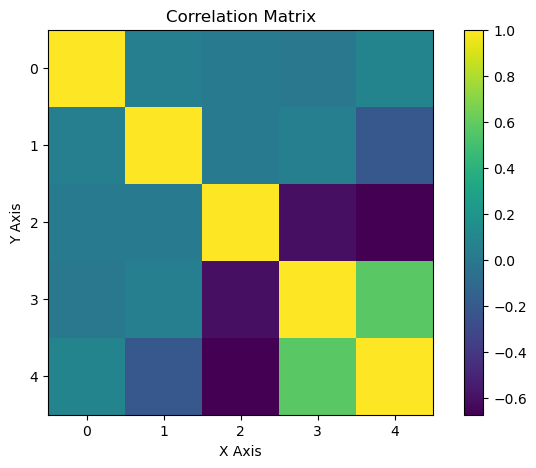

In [45]:
plt.figure(figsize=(8,5))
plt.imshow(heatmap)
plt.title("Correlation Matrix")
plt.xlabel("X Axis")
plt.ylabel("Y Axis")
plt.colorbar()
plt.show()

In [47]:
#Linear regression
from sklearn.linear_model import LinearRegression
reg1 = LinearRegression()
reg1.fit(xtrain,ytrain)

LinearRegression()

In [49]:
y_pred = reg1.predict(xtest)

In [51]:
y_pred

array([[48.90992869],
       [39.01008134],
       [29.97108085],
       [28.23905566],
       [32.54652137],
       [31.63017687],
       [35.18202925],
       [26.92511408],
       [45.70848237],
       [53.88175445],
       [47.65570309],
       [33.10702357],
       [46.89181188],
       [54.76075034],
       [50.33644379],
       [33.80762148],
       [44.03885386],
       [34.66122879],
       [16.00370131],
       [27.66762753],
       [40.77460191],
       [ 9.66927777],
       [43.00404189],
       [40.05540776],
       [16.89474014],
       [32.2370303 ],
       [29.48830526],
       [51.63147173],
       [25.25270534],
       [42.225409  ],
       [53.23074378],
       [41.9365139 ],
       [38.19050892],
       [44.90606342],
       [25.81895892],
       [27.65899055],
       [43.67699028],
       [29.66309128],
       [34.3157736 ],
       [25.24659414],
       [31.93945232],
       [26.25521795],
       [52.92651915],
       [34.54898354],
       [31.83736581],
       [43

In [53]:
reg1.score(xtrain,ytrain)

0.5932978240698912

In [55]:
reg1.score(xtest,ytest)   #Predicting the target values using the testing data.

0.46527814487170127

# Polynomial Features

In [58]:
from sklearn.preprocessing import PolynomialFeatures

In [60]:
x.shape

(414, 4)

In [62]:
y.shape

(414, 1)

In [64]:
poly = PolynomialFeatures(degree=2)
x_poly = poly.fit_transform(x)

In [66]:
x_poly.shape

(414, 15)

In [68]:
pd.DataFrame(x_poly)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,1.0,2012.0,32.0,84.87882,10.0,4048144.0,64384.0,1.707762e+05,20120.0,1024.00,2716.122240,320.0,7.204414e+03,848.78820,100.0
1,1.0,2012.0,19.5,306.59470,9.0,4048144.0,39234.0,6.168685e+05,18108.0,380.25,5978.596650,175.5,9.400031e+04,2759.35230,81.0
2,1.0,2013.0,13.3,561.98450,5.0,4052169.0,26772.9,1.131275e+06,10065.0,176.89,7474.393850,66.5,3.158266e+05,2809.92250,25.0
3,1.0,2013.0,13.3,561.98450,5.0,4052169.0,26772.9,1.131275e+06,10065.0,176.89,7474.393850,66.5,3.158266e+05,2809.92250,25.0
4,1.0,2012.0,5.0,390.56840,5.0,4048144.0,10060.0,7.858236e+05,10060.0,25.00,1952.842000,25.0,1.525437e+05,1952.84200,25.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
409,1.0,2013.0,13.7,4082.01500,0.0,4052169.0,27578.1,8.217096e+06,0.0,187.69,55923.605500,0.0,1.666285e+07,0.00000,0.0
410,1.0,2012.0,5.6,90.45606,9.0,4048144.0,11267.2,1.819976e+05,18108.0,31.36,506.553936,50.4,8.182299e+03,814.10454,81.0
411,1.0,2013.0,18.8,390.96960,7.0,4052169.0,37844.4,7.870218e+05,14091.0,353.44,7350.228480,131.6,1.528572e+05,2736.78720,49.0
412,1.0,2013.0,8.1,104.81010,5.0,4052169.0,16305.3,2.109827e+05,10065.0,65.61,848.961810,40.5,1.098516e+04,524.05050,25.0


In [70]:
xtrain, xtest,ytrain, ytest = train_test_split(x_poly,y, test_size=0.3,random_state=3)

In [72]:
reg2 = LinearRegression()
reg2.fit(xtrain, ytrain)

LinearRegression()

In [125]:
xtrain.shape

(289, 15)

In [159]:
reg2.predict(xtrain)

C:\Users\PC\anaconda3\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(


ValueError: X has 4 features, but LinearRegression is expecting 15 features as input.

In [157]:
reg2.predict(xtrain)

C:\Users\PC\anaconda3\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(


ValueError: X has 4 features, but LinearRegression is expecting 15 features as input.

In [74]:
y_pred2 = reg2.predict(xtest)

In [76]:
y_pred2

array([[38.04745366],
       [41.47293036],
       [41.43389812],
       [54.37804431],
       [30.71753044],
       [36.28592422],
       [17.29882881],
       [44.5035082 ],
       [57.44216322],
       [53.14429679],
       [54.45637383],
       [29.43904782],
       [52.82972605],
       [49.28899027],
       [47.5459134 ],
       [41.32917458],
       [42.39668782],
       [27.54804815],
       [39.49313502],
       [15.2252644 ],
       [57.87011828],
       [29.89537569],
       [21.59319027],
       [19.66122685],
       [31.94550627],
       [42.75561186],
       [38.04136133],
       [47.15589953],
       [24.41529647],
       [51.97093501],
       [43.9083057 ],
       [47.11150775],
       [58.15801259],
       [17.29564482],
       [45.29765555],
       [38.83920479],
       [42.67893527],
       [45.45388441],
       [57.87011828],
       [44.155895  ],
       [51.90841892],
       [45.55931587],
       [34.26961415],
       [41.26739964],
       [45.15101222],
       [45

In [78]:
xtest.shape

(125, 15)

In [80]:
reg2.score(xtrain,ytrain)

0.6281792464745168

In [82]:
reg2.score(xtest,ytest)

0.6287923087241547

In [84]:
# pipeline
from sklearn.pipeline import make_pipeline
pipeline = make_pipeline(PolynomialFeatures(degree = 2), LinearRegression())
pipeline.fit(x,y)

Pipeline(steps=[('polynomialfeatures', PolynomialFeatures()),
                ('linearregression', LinearRegression())])

In [86]:
pipeline.predict(x)

array([[45.01195976],
       [42.23629646],
       [42.08112304],
       [42.08112304],
       [47.03161716],
       [26.73838482],
       [35.74825996],
       [43.90095329],
       [18.37696353],
       [27.04037086],
       [36.66760597],
       [54.62563735],
       [39.95091395],
       [18.36523854],
       [34.5593182 ],
       [36.9507733 ],
       [55.59174535],
       [33.58353545],
       [44.42239095],
       [57.1709968 ],
       [28.42195079],
       [48.364112  ],
       [27.90025145],
       [48.58784214],
       [41.51481107],
       [28.81163255],
       [48.82953995],
       [47.48354017],
       [39.38306059],
       [47.14705029],
       [18.79585607],
       [33.45572106],
       [29.52487637],
       [44.52171376],
       [44.10829488],
       [19.08037006],
       [24.53327406],
       [32.80306095],
       [46.84135356],
       [44.4668571 ],
       [19.13563164],
       [18.67226759],
       [40.82822938],
       [36.10771425],
       [48.95289645],
       [43

In [123]:
pipeline.predict([[114523.61, 136897.80, 471784.10]])

C:\Users\PC\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(


ValueError: X has 3 features, but PolynomialFeatures is expecting 4 features as input.

In [88]:
pipeline.predict([[4255771.3564, 5421.2354, 415322.6541,541232.639845]])

C:\Users\PC\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(


array([[-8.49548137e+11]])

In [107]:
x.shape

(414, 4)

In [109]:
pipeline.score(x,y)

0.6355793893766861

In [111]:
y_pred.shape

(125, 1)

In [113]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
mse = mean_squared_error(y_pred,ytest)   #from regression
mse

278.90052247014586

In [115]:
mse_poly = mean_squared_error(y_pred2,ytest)   #from polynomial regression
mse_poly

66.99481576675895

# R^2 score

In [133]:
x.shape

(414, 4)

In [137]:
y.shape

(414, 1)

In [121]:
from sklearn.linear_model import LinearRegression, Lasso, Ridge 

In [141]:
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.3, random_state=0)

In [143]:
lasso_model = Lasso()
lasso_model.fit(xtrain,ytrain)

Lasso()

In [151]:
ridge_model = Ridge()
ridge_model.fit(xtrain,ytrain)

Ridge()

In [153]:
lasso_score = lasso_model.score(xtest,ytest)
lasso_score

0.5390090746378506

In [155]:
ridge_score = ridge_model.score(xtest,ytest)
ridge_score

0.5517395857733738

In [ ]:
scores = [lasso_SCORE, ridge_SCORE]
models = ['Lasso', 'Ridge']

for i, score in enumerate(scores):
    plt.text(i, score+.02, f'{score:.3f}', ha='center')

plt.bar(models, scores)
plt.ylabel('R² Score')
plt.title('Model Performance Comparison')
plt.ylim(0, 1)
plt.show()